Everything in this notebook is my work for the third exercise of the AML course.

# **Data Preprocessing**

Preprocess the datasets "Airfare and demand" and "Wine Quality".
I begin with the "Airfare and demand" dataset. If we put the names of the columns above, it will be easier to distinguish their values and work with them. I extracted the column specifications and the column names from the **airq402.txt** (see the zip file).

In [80]:
# Load the dataset
import pandas as pd
import numpy as np

# If we put the names of the columns above them, it would be easier to distinguish their values and to work with them
# I extracted the column specification and the column names from the airq402.txt (it's in the zip file)
column_specifications = [(0, 3), (4, 7), (10, 17), (19, 23), (25, 33), (35, 37),
                         (39, 45), (47, 54), (56, 58), (60, 66), (68, 75)]

column_names = ["City1", "City2", "Average_Fare", "Distance", "Avg_Weekly_Passengers",
                "Market_Leading_Airline", "Market_Share", "Avg_Fare_Market", 
                "Low_Price_Airline", "Market_Share_Low_Price", "Price"]

airq_data = pd.read_fwf("airq_data/airq402.dat", colspecs=column_specifications, names=column_names)
airq_data.head()

,City1,City2,Average_Fare,Distance,Avg_Weekly_Passengers,Market_Leading_Airline,Market_Share,Avg_Fare_Market,Low_Price_Airline,Market_Share_Low_Price,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


(1) Convert any non-numeric values to numeric values.

I use one-hot encoding, so we can transform the non-numeric values to numeric and be easier to use them in the linear regression analysis.

In [81]:
categ_columns = ["City1", "City2", "Market_Leading_Airline", "Low_Price_Airline"]
airq_data = pd.get_dummies(airq_data, columns=categ_columns)
airq_data.head()

,Average_Fare,Distance,Avg_Weekly_Passengers,Market_Share,Avg_Fare_Market,Market_Share_Low_Price,Price,City1_ABQ,City1_ACY,City1_ALB,...,Low_Price_Airline_G4,Low_Price_Airline_HP,Low_Price_Airline_NK,Low_Price_Airline_NW,Low_Price_Airline_SY,Low_Price_Airline_TZ,Low_Price_Airline_UA,Low_Price_Airline_US,Low_Price_Airline_WN,Low_Price_Airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


(2) Handle sparse data/missing values

In [82]:
airq_data.isnull().any()

Average_Fare             False
Distance                 False
Avg_Weekly_Passengers    False
Market_Share             False
Avg_Fare_Market          False
                         ...  
Low_Price_Airline_TZ     False
Low_Price_Airline_UA     False
Low_Price_Airline_US     False
Low_Price_Airline_WN     False
Low_Price_Airline_YX     False
Length: 217, dtype: bool

It looks like there aren’t any missing values. If there were, we could either remove the rows or columns that contain them. For numeric columns with missing values, we could fill those gaps with the mean, median, or a constant value. If the missing values were in categorical columns, we could replace them with the mode or use a placeholder category, like a new category to indicate that the value is missing.

(3) Split the data

In [83]:
np.random.seed(18)

def split_data(Xdata, Ydata, train_percent):
    split_index = int(train_percent * len(Xdata))

    indices = np.arange(len(Xdata))
    np.random.shuffle(indices)

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    Xtrain = Xdata.iloc[train_indices].reset_index(drop=True)
    Ytrain = Ydata.iloc[train_indices].reset_index(drop=True)
    Xtest = Xdata.iloc[test_indices].reset_index(drop=True)
    Ytest = Ydata.iloc[test_indices].reset_index(drop=True)
    
    return Xtrain, Ytrain, Xtest, Ytest

airq_Xdata = airq_data.drop(columns=["Price"])
airq_Ydata = airq_data["Price"]
airq_Xtrain, airq_Ytrain, airq_Xtest, airq_Ytest = split_data(airq_Xdata, airq_Ydata, 0.8)

Next, I preprocess the "Wine Quality" dataset.

In [84]:
red_wine_data = pd.read_csv("wine_quality_data/winequality-red.csv", sep=';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
white_wine_data = pd.read_csv("wine_quality_data/winequality-white.csv", sep=';')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(1) Convert the non-numeric values to numeric

In [86]:
non_numeric_check = red_wine_data.apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
non_numeric_columns = non_numeric_check.any()
non_numeric_columns_with_names = non_numeric_columns[non_numeric_columns].index.tolist()
non_numeric_columns_with_names

[]

In [87]:
non_numeric_check = white_wine_data.apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
non_numeric_columns = non_numeric_check.any()
non_numeric_columns_with_names = non_numeric_columns[non_numeric_columns].index.tolist()
non_numeric_columns_with_names

[]

After checking if there are any non-numeric values, we can conclude that we don't have and we don't have anything to transform

(2) Handle sparse data / missing values

In [88]:
white_wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [89]:
red_wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

The red wine and the white wine dataset has no missing data. We don't have to handle anything.

(3) Split the data

In [90]:
red_wine_Xdata = red_wine_data.drop(columns=["quality"])
red_wine_Ydata = red_wine_data["quality"]
red_wine_Xtrain, red_wine_Ytrain, red_wine_Xtest, red_wine_Ytest = split_data(red_wine_Xdata, red_wine_Ydata, 0.8)

white_wine_Xdata = white_wine_data.drop(columns=["quality"])
white_wine_Ydata = white_wine_data["quality"]
white_wine_Xtrain, white_wine_Ytrain, white_wine_Xtest, white_wine_Ytest = split_data(white_wine_Xdata, white_wine_Ydata, 0.8)

# **Linear Regression with Gradient Descent**

Given:

(1) The Linear Regression model is given as $\hat{y}_n$ = $\sum_{m=1}^{M}{\beta_m x_m} $

(2) The Least Square Loss Function is given as $\mathcal{L}(\beta) = \sum_{n=1}^{N} (y_n - \hat{y}_n)^2$

#### **Algorithm 1: Gradient Descent: MINIMIZE-GD**

**Procedure**: Minimize-GD $(f : \mathbb{R}^N \rightarrow \mathbb{R}, x_0 \in \mathbb{R}^N, \alpha, i_{max} \in \mathbb{N}, \epsilon \in \mathbb{R}^+)$
1. For $i = 1, \ldots, imax$:
    1. $d \gets -\frac{\partial f}{\partial x}(x_{i-1})$
    2. $\alpha_i \gets \alpha(f, x_{i-1}, d)$
    3. $x_i \gets x_{i-1} + \alpha_i \cdot d$
    4. If $|f(x_{i-1}) - f(x_i)| < \epsilon:$
        Return $x_i$
2. Error: "not converged in $i_{max}$ iterations"

**End Procedure**

In [91]:
from scipy.optimize import approx_fprime

def rmse(y_test, y_pred):
   return np.sqrt(np.mean((y_test - y_pred) ** 2))

def predict(X_test, x_new):
   return X_test @ x_new

def minimize_gd(f, x0, alpha, imax, epsilon, Xtest=None, Ytest=None, for_plotting=False, clipp=False):
    """
    Performs gradient descent optimization to minimize a given function.

    Parameters:
    ----------
    f : callable
        The objective function to be minimized.

    x0 : np.ndarray
        The initial guess for the parameters. It should be a 1D array-like structure
        representing the starting point for the optimization.

    alpha : callable
        A function that determines the step length for the gradient descent. 

    imax : int
        The maximum number of iterations to perform in the optimization process. 

    epsilon : float
        The tolerance for convergence. 

    Xtest : np.ndarray, optional
        The test input features for evaluating the model's performance after training.
       
    Ytest : pd.Series, optional
        The target variable for the test set..

    for_plotting : bool, optional
        If True, the function will return additional data for plotting the convergence process.
        This includes the differences in loss values and root mean squared error at each iteration.

    clipp : bool, optional
        If True, applies gradient clipping to prevent exploding gradients. This normalization 
        step ensures the gradient does not exceed a specified maximum norm.

    Returns:
    -------
    xi : np.ndarray
        The optimized parameters after the gradient descent process. 

    diffs : list, optional
        A list of differences in function values for each iteration (only returned if 
        for_plotting is True). This can be used to visualize the convergence of the
        optimization process.

    rmses : list, optional
        A list of root mean squared error values on the test set for each iteration 
        (only returned if for_plotting is True). This helps in assessing the model's 
        performance over iterations."""
    
    xi = x0.copy()
    alpha_i = 0.01
    if for_plotting:
        diffs = []
        rmses = []
        
        for _ in range(imax):   
            d = -approx_fprime(xi, f, epsilon=1e-8)
            if clipp:
                max_norm = 1.0 
                d_norm = np.linalg.norm(d)
                if d_norm > max_norm:
                    d = d / d_norm * max_norm  # Normalize the gradient
            if alpha.__name__ == "step_length_bold_driver":         
                alpha_i = alpha(f, xi, d, alpha_i)    
            else:
                alpha_i = alpha(f, xi, d)
            xi_new = xi + alpha_i * d
            diff = abs(f(xi) - f(xi_new))
            diffs.append(diff)
            xi = xi_new

            if Xtest is not None and Ytest is not None:
                pred = predict(np.c_[np.ones(Xtest.shape[0]), Xtest], xi)  # Include bias
                rmse_value = rmse(Ytest, pred)
                rmses.append(rmse_value)

            if diff < epsilon:
                return xi, diffs, rmses    
        print(f"Not converged in imax = {imax} iterations")
        return [],[],[]
    else:
        for _ in range(imax):
            
            d = -approx_fprime(xi, f, epsilon=1e-8)
            if clipp:
                max_norm = 1.0
                d_norm = np.linalg.norm(d)
                if d_norm > max_norm:
                    d = d / d_norm * max_norm  # Normalize the gradient => gradient clipping
            if alpha.__name__ == "step_length_bold_driver":         
                alpha_i = alpha(f, xi, d, alpha_i)    
            else:
                alpha_i = alpha(f, xi, d)
            xi += alpha_i * d
        
            if abs(f(xi) - f(xi - alpha_i * d)) < epsilon:
                return xi   
        
        print(f"Not converged in imax = {imax} iterations")
        return []

A possible performance optimization for the gradient computation is to calculate the gradient of the cost function and just plug-in values for $x_i$. Mathematically expressed:

Using (1) and (2) (see above), we can find the first derivative of the cost function. The cost function has the form 

$$\mathcal{L}(\beta) = \sum_{n=1}^{N} (y_n - \bold{x_n}\beta)^2$$

, where $\bold{x_n}$ is a sample and $\beta$ is a vector of the weights.

The first derivate is:
 
$$\nabla \mathcal{L} (\beta) = 2\bold{X}^T.(\bold{X}\beta - \bold{y})$$

, where $\beta$ is a vector of the weights (in the code above this is $x_i$), $\bold{X}$ is the dataset (rows of the matrix are samples and columns are features) and $\bold{y}$ is a vector of the true target values.

Then we replace *approx_fprime* with the computed gradient above.


#### **Algorithm 2: Learn Linear Regression via Loss Minimization: GD**

 **Procedure**: Learn-LinReg-GD $(D_{\text{train}} := \{(x_1, y_1), \ldots, (x_N, y_N)\}, \alpha, i_{max} \in \mathbb{N}, \epsilon \in \mathbb{R}^+)$
1. $X := (x_1, x_2, \ldots, x_N)^T$
2. $y := (y_1, y_2, \ldots, y_N)^T$
3. $\hat{\beta}_0 := (0, \ldots, 0)$
4. $\hat{\beta} := \text{Minimize-GD}\left(f(\hat{\beta}) := (y - X\hat{\beta})^T (y - X\hat{\beta}), \hat{\beta}_0, \alpha, i_{max}, \epsilon\right)$
5. Return $\hat{\beta}$

**End Procedure**

In [ ]:
def learn_linreg_gd(Xtrain, Ytrain, alpha, imax, epsilon, Xtest, Ytest, for_plotting=False, clipp=False):
    """
    Performs linear regression using gradient descent to minimize the mean squared error.


    Parameters:
    ----------
    Xtrain : np.ndarray
        The training input features. It is expected to be a 2D array where each row
        represents a training example and each column represents a feature.
        
    Ytrain : pd.Series
        The target variable for training. It should be a 1D array-like structure containing
        the true values corresponding to the training features.

    alpha : float
        The step size function for gradient descent. 

    imax : int
        The maximum number of iterations for the gradient descent algorithm.

    epsilon : float
        The tolerance for convergence.

    Xtest : np.ndarray
        The test input features for evaluating the model's performance after training.
        Similar to `Xtrain`.

    Ytest : pd.Series
        The target variable for the test set.

    for_plotting : bool, optional
        If True, the function will return additional data for plotting the convergence process.
        This includes the differences in loss values and root mean squared error at each iteration.

    clipp : bool, optional
        If True, applies gradient clipping to prevent exploding gradients.

    Returns:
    -------
    beta_hat : np.ndarray
        The estimated coefficients of the linear regression model. This array contains the 
        weights that minimize the mean squared error loss function.

    diffs : list, optional
        The list of differences in loss values for each iteration (only returned if 
        for_plotting is True). This can be used to visualize the convergence of the
        optimization process.

    rmses : list, optional
        The list of root mean squared error values on the test set for each iteration 
        (only returned if for_plotting is True). This helps in assessing the model's 
        performance over iterations.

    Example:
    --------
    beta_hat, diffs, rmses = learn_linreg_gd(Xtrain, Ytrain, alpha=0.01, imax=1000, 
                                             epsilon=1e-6, Xtest=Xtest, Ytest=Ytest,
                                             for_plotting=True, clipp=True)
    """
    N = Xtrain.shape[0]
    X = np.c_[np.ones(N), Xtrain] 
    y = Ytrain.values 
    beta_init = np.zeros(X.shape[1])

    def loss(beta):
        pred = predict(X, beta)
        return np.mean((pred - y) ** 2)

    if for_plotting:
        beta_hat, diffs, rmses = minimize_gd(loss, beta_init, alpha, imax, epsilon, Xtest, Ytest, for_plotting, clipp)
        return beta_hat, diffs, rmses
    else:
        beta_hat = minimize_gd(loss, beta_init, alpha, imax, epsilon, Xtest, Ytest, for_plotting, clipp)
        return beta_hat
    

(1) Choose three suitable values for the step length $\alpha$ > 0. Explain what is the difference.

Here, I chose the three cases:
* $\alpha$ = 0.001 (small)
* $\alpha$ = 0.01 (moderate)
* $\alpha$ = 0.1 (large)

In [93]:
alphas = [
    # small
    lambda f, beta, grad: 0.001,
    # moderate
    lambda f, beta, grad: 0.01,
    # large
    lambda f, beta, grad: 0.1
]

(2) In each iteration of the **minimize-GD** algorithm, calculate $|f(x_{i−1}) − f(x_i)|$ and, at the end of learning,
plot it against the iteration number *i*. Explain the graph.


(3) In each iteration step, also calculate the **RMSE** on the test set RMSE = $\sqrt{\sum_{q=1}^T ({y_{test}}^q - \hat{y}^q)^2/T}$ and, at the end of learning, plot it against the iteration number i. Explain the graph.

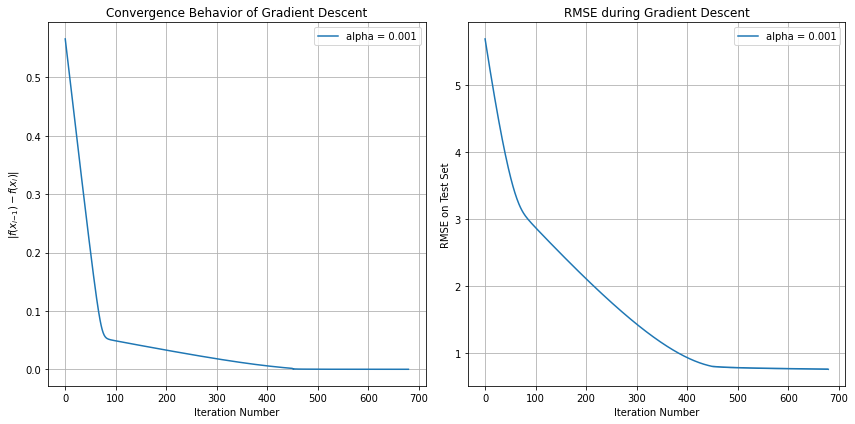

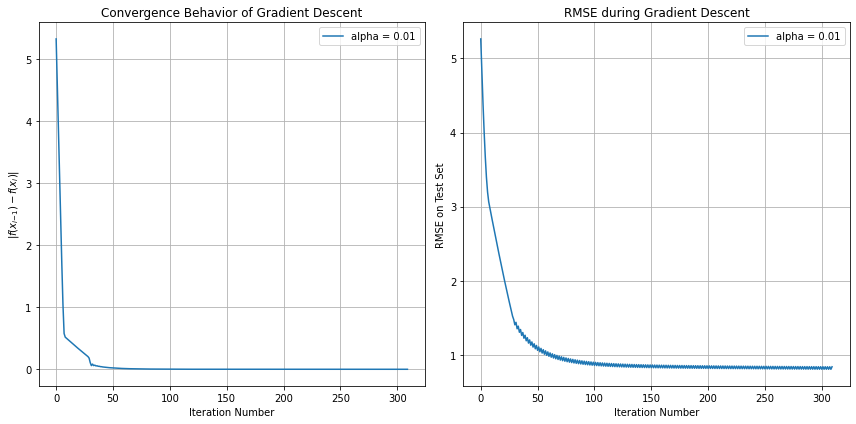

Not converged in imax = 1000 iterations


In [94]:
import matplotlib.pyplot as plt

imax = 1000
epsilon = 1e-4
for alpha in alphas:
    beta_hat, diffs, rmses = learn_linreg_gd(red_wine_Xtrain, red_wine_Ytrain, alpha, imax, epsilon, red_wine_Xtest, red_wine_Ytest, for_plotting=True, clipp=True)
    if not len(beta_hat) or not len(diffs) or not len(rmses):
        continue
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(diffs, label=f'аlpha = {alpha(None,None,None)}')
    plt.xlabel('Iteration Number')
    plt.ylabel(r'$|f(x_{i−1}) - f(x_{i})|$')
    plt.title('Convergence Behavior of Gradient Descent')
    plt.legend()
    plt.grid()
    
    # Plot RMSE against iteration number
    plt.subplot(1, 2, 2)
    plt.plot(rmses, label=f'alpha = {alpha(None,None,None)}')
    plt.xlabel('Iteration Number')
    plt.ylabel('RMSE on Test Set')
    plt.title('RMSE during Gradient Descent')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

#### **Analysis of using different step lengths**

Choosing an appropriate step length is crucial for the speed of convergence in gradient descent. A small step size can lead to slow convergence, as evidenced by the fact that it took 100 more iterations for convergence when using $\alpha$ = 0.001 compared to $\alpha$ = 0.01. On the other hand, a moderate step size yields the best results with fixed step lengths, as it facilitates the fastest convergence..

Using an excessively large step size is not a viable solution, as it may cause the algorithm to overshoot or oscillate around the minimum without finding a solution, which we observed in our experiments. Additionally, the precision we aim for plays a significant role. By altering the $\epsilon$ constant, we noticed that even more iterations were required for convergence. The smaller $\epsilon$ is, the more difficult it gets to find an appropriate $\alpha$.

**Note**: I decided to improve the **minimize-gd** method by implementing *gradient clipping*. The motivation behind this decision stemmed from encountering overflow issues due to excessively large gradients (often referred to as "gradient explosion"). After incorporating gradient clipping, the process stabilized, allowing for more reliable convergence. 

# **Step Length for Gradient Descent**

(1) Implement **steplength-armijo**

#### **Algorithm 3: Armijo Step Length**

**Procedure**: StepLength-Armijo $(f : R^N \to R, x \in R^N, d \in R^N, \delta \in (0, 1))$  

1. $\alpha \leftarrow 1$  
2. **While** $f(x) - f(x + \alpha d) < \alpha \delta d^T d$ **do**  
3. &nbsp;&nbsp;&nbsp;&nbsp; $\alpha \leftarrow \alpha / 2$  
4. **End While**  
5. **Return** $\alpha$  

**End Procedure**

In [95]:
def armijo_step_length(f, x, d, delta=0.1):
    """
    Armijo Step Length Algorithm.

    Parameters:
    - f: The objective function to minimize.
    - x: Current point (N-dimensional).
    - d: Direction to search (N-dimensional).
    - delta: Parameter in the range (0, 1) for the Armijo condition.

    Returns:
    - The step length alpha that satisfies the Armijo condition.
    """
    alpha = 1.0

    f_x = f(x)

    # Armijo condition
    while f_x - f(x + alpha * d) < alpha * delta * np.dot(d, d):
        alpha /= 2 
    
    return alpha

(2) Implement **steplength-bolddriver**

####  **Algorithm 4: Bold Driver Step Length**

**Procedure**: StepLength-BoldDriver $(f : R^N \to R, x \in R^N, d \in R^N, \alpha_{\text{old}}, \alpha_{+}, \alpha_{-} \in (0, 1))$  

1. $\alpha := \alpha_{\text{old}} \alpha_{+}$  
2. **While** $f(x) - f(x + \alpha d) \leq 0$ **do**  
3. &nbsp;&nbsp;&nbsp;&nbsp; $\alpha = \alpha \alpha_{-}$  
4. **End While**  
5. **Return** $\alpha$  

**End Procedure**

In [96]:
def step_length_bold_driver(f, x, d, alpha_old=0.01, alpha_plus=1.1, alpha_minus=0.5):
    """
    Bold Driver Step Length Algorithm.

    Parameters:
    - f: The objective function to minimize.
    - x: Current point (N-dimensional).
    - d: Direction to search (N-dimensional).
    - alpha_old: Previous step length.
    - alpha_plus: Factor to increase step length.
    - alpha_minus: Factor to decrease step length.

    Returns:
    - The step length alpha that satisfies the Bold Driver condition.
    """
    alpha = alpha_old * alpha_plus

    while f(x) - f(x + alpha * d) <= 0:
        alpha *= alpha_minus

    return alpha

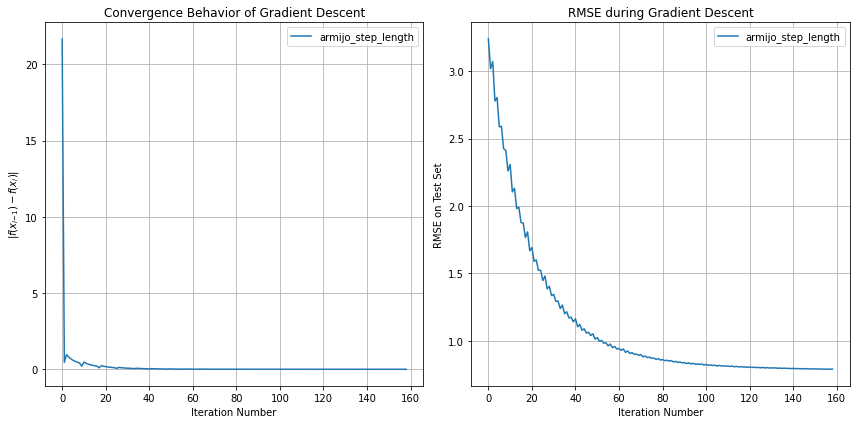

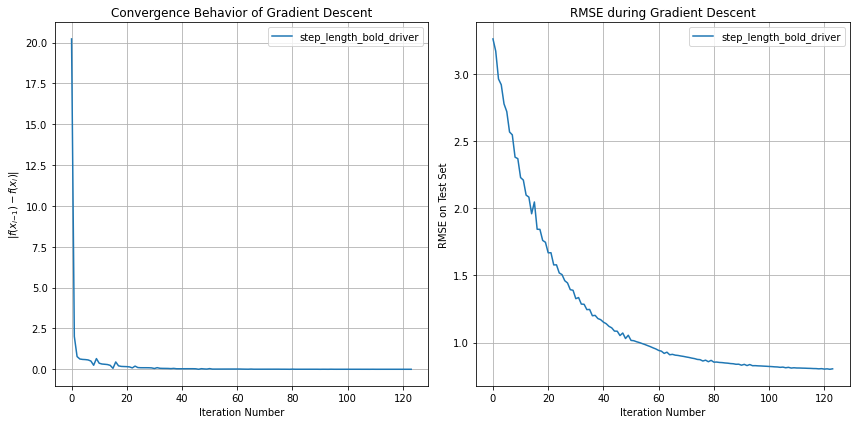

In [97]:
beta_hat, diffs, rmses = learn_linreg_gd(red_wine_Xtrain, red_wine_Ytrain, armijo_step_length, imax, epsilon, red_wine_Xtest, red_wine_Ytest, for_plotting=True)
 
# armijo_step_length
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(diffs, label='armijo_step_length')
plt.xlabel('Iteration Number')
plt.ylabel(r'$|f(x_{i−1}) - f(x_{i})|$')
plt.title('Convergence Behavior of Gradient Descent')
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(rmses, label='armijo_step_length')
plt.xlabel('Iteration Number')
plt.ylabel('RMSE on Test Set')
plt.title('RMSE during Gradient Descent')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# step_length_bold_driver
beta_hat, diffs, rmses = learn_linreg_gd(red_wine_Xtrain, red_wine_Ytrain, step_length_bold_driver, imax, epsilon, red_wine_Xtest, red_wine_Ytest, for_plotting=True)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(diffs, label='step_length_bold_driver')
plt.xlabel('Iteration Number')
plt.ylabel(r'$|f(x_{i−1}) - f(x_{i})|$')
plt.title('Convergence Behavior of Gradient Descent')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(rmses, label='step_length_bold_driver')
plt.xlabel('Iteration Number')
plt.ylabel('RMSE on Test Set')
plt.title('RMSE during Gradient Descent')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#### **Analysis of **armijo_steplength** and **step_length_bold_driver****


All in all, both algorithms perform better then simply using a constant value for alpha. This is because the step size is being adaptively adjusted. 

The idea of **Bold Driver** algorithm is to increase the step size when the last step resulted in a decrease in the objective function and to decrease it when the last step didn't result in a decrease. This helps by allowing larger steps in the direction of improvement and smaller steps when approaching a minimum.

The **Armijo** step length on the other side makes sure that each step results in a sufficient decrease in the objective function, which contributes to faster convergence.

Here, we see that the **Bold Driver** algorithm converges faster, but this isn't always the case. It highly depends on the data we use and how we define the hyperparameters. This may lead to different results.

#### **Analysis of differences, pros and cons of Closed-form Linear Regression and Gradient Descent Linear Regression**

In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(red_wine_Xtrain, red_wine_Ytrain)
pred = model.predict(red_wine_Xtest)
rmse_value = rmse(red_wine_Ytest, pred)
print("RMSE of Closed-form Linear Regression:\n", rmse_value)
print("-"*40)
print("RMSE of Gradient Descent Linear Regression (Bold Driver Step Length Algorithm):\n", rmses[-1])

RMSE of Closed-form Linear Regression:
 0.6834729146214934
----------------------------------------
RMSE of Gradient Descent Linear Regression (Bold Driver Step Length Algorithm):
 0.80399949318728


The closed-form solution definitely has its perks, like achieving a lower RMSE. It provides an exact solution in just one calculation, whereas gradient descent gives us an approximate solution. Plus, the closed-form method doesn't need hyperparameters like learning rate or the number of iterations, which are essential for gradient descent. If we don't pick these hyperparameters carefully, the optimization might not converge.

That said, gradient descent can be super useful in some scenarios. For large datasets, calculating $(\bold{X}^T\bold{X})^{-1}$ can be pretty resource-intensive, making gradient descent a better option. It's also more flexible. In situations where a closed-form solution isn't even possible - like with the cross-entropy cost function or neural networks - we rely on some form of gradient descent, such as SGD or Mini-Batch GD.

